<a href="https://colab.research.google.com/github/valintea/Trabajo_Tecnicas/blob/main/Trabajo_T%C3%A9cnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                  **Valentin Constantin Lintean**, **Jon Ruiz Carrillo Idarreta**

# **Analisis del dataset "Twitter US Airline Sentiment"**

Este trabajo se centra en el análisis los tweets recopilados del conjunto de datos "Twitter US Airline Sentiment". Este dataset, disponible en Kaggle, contiene  tweets relacionados con experiencias de usuarios en aerolíneas estadounidenses. La elección de este conjunto de datos se basa en necesidad de detectar las experiencias negativas de los usuarios hacia las aerolíneas, con el objetivo de mejorar la calidad de los servicios ofrecidos.

### **Problema planteado**

El problema planteado se centra en la detección y análisis de tweets negativos relacionados con experiencias de vuelo en la aerolínea Virgin America. La tarea consiste en desarrollar un modelo capaz de identificar automáticamente aquellos tweets que expresan opiniones o experiencias negativas por parte de los usuarios.


### **Datos recogidos**


Este dataset contiene información recopilada de tweets relacionados con aerolíneas en los Estados Unidos de febrero de 2015.

https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
import pandas as pd
df = pd.read_csv('Tweets.csv')




Descripción de los atributos del dataset:



- **airline_sentiment(variable objetivo)**: Sentimiento expresado en el tweet (positivo, negativo o neutral).

- tweet_id: Identificador único del tweet.

- airline_sentiment_confidence: Nivel de confianza asociado al sentimiento expresado.

- negativereason: Razón específica asociada a tweets negativos.

- negativereason_confidence: Nivel de confianza asociado a la razón específica en tweets negativos.

- airline: Aerolínea relacionada con el tweet (en este caso, Virgin America).

- retweet_count: Cantidad de retweets del tweet.

- text: Contenido del tweet.

- tweet_coord: Coordenadas asociadas al tweet (ubicación geográfica).

- tweet_created: Fecha y hora de creación del tweet.

- tweet_location: Ubicación declarada por el usuario en el tweet.

- user_timezone: Zona horaria declarada por el usuario.



A continuación, se muestran los atributos de las primeras 5 instancias del dataset:

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Como podemos ver a continuaión, el dataset contiene información sobre 14,262 tweets relacionados con aerolíneas. Cada fila representa un tweet, y hay 15 columnas que contienen distintos atributos asociados a cada tweet.

Algunas columnas tienen valores faltantes, como "negativereason", "negativereason_confidence", "tweet_coord".

Nos centraremos en el únicamente en análisis de los tweets y su sentimiento, utilizando la columna "airline_sentiment" y 'text'.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### **Tratamiento dado a los datos**

A continuación, se muestra la cantidad de tweets para cada clase:

In [ ]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Observamos, que un desequilibrio moderado entre las tres clases, siendo la clase negativa la mas representada, con una proporción de 1 a 3 con la segunda clase más representada.

Teniendo en cuenta que nuestro objetivo es detectar los tweets negativos, hemos unido la clase neutral y negativa en una misma clase, de este modo el dataset queda más balanceado y por otro lado también simplificamos el análisis planteado.

In [ ]:
df['airline_sentiment'] = df['airline_sentiment'].replace({'neutral': 'positive'})

A continuación, se muestran el recuento de cada clase despues de la transformación.

In [ ]:
df.airline_sentiment.value_counts()

negative    9178
positive    5462
Name: airline_sentiment, dtype: int64

A continuación, se muestran algunos de los tweets del dataset.

In [ ]:
for tweet in df['text'][90:120]:
    print(tweet)

@VirginAmerica "You down with RNP?" "Yeah you know me!"
@VirginAmerica hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?
@VirginAmerica I like the TV and interesting video . Just disappointed in Cancelled Flightled flight when other flights went out to jfk on Saturday .
@VirginAmerica just landed in LAX, an hour after I should of been here. Your no Late Flight bag check is not business travel friendly #nomorevirgin
@VirginAmerica why is flight 345 redirected?
@VirginAmerica Is it me, or is your website down?  BTW, your new website isn't a great user experience.  Time for another redesign.
@VirginAmerica I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y
@VirginAmerica - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable
@virginamerica What is your phone number. I can't find who to ca

Se observa que todo los tweets comienzan por la mención de un usuario de una aerolinea.

A continuación, identificamos todas las palabras que empiezan por @, para encontrar las menciones.

In [ ]:
import pandas as pd
import re


# Patrón de enlaces
patron_enlace = r'@'

matches=[]
# Iterar sobre las filas y aplicar la condición
for index, row in df.iterrows():
    matches += re.findall(r'@\w+', row['text'])

matches[0:10]


['@VirginAmerica',
 '@dhepburn',
 '@VirginAmerica',
 '@VirginAmerica',
 '@VirginAmerica',
 '@VirginAmerica',
 '@VirginAmerica',
 '@VirginAmerica',
 '@VirginAmerica',
 '@virginamerica']

Se puede observar que la mayoría de las palabras detectadas se corresponden a menciones directas a aerolineas. El resto, son menciones a otros usuarios de Twitter. En ninguno de los casos interesan por lo que se procede a elminarlos.

In [ ]:
# Iterar sobre las filas y aplicar la condición
for index, row in df.iterrows():
    texto_sin_enlaces = re.sub(r'@\w+', '', row['text'])
    df.at[index, 'text'] = texto_sin_enlaces

A continuación, se muestran los tweets sin las menciones.

In [ ]:
for tweet in df['text'][90:120]:
    print(tweet)

 "You down with RNP?" "Yeah you know me!"
 hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?
 I like the TV and interesting video . Just disappointed in Cancelled Flightled flight when other flights went out to jfk on Saturday .
 just landed in LAX, an hour after I should of been here. Your no Late Flight bag check is not business travel friendly #nomorevirgin
 why is flight 345 redirected?
 Is it me, or is your website down?  BTW, your new website isn't a great user experience.  Time for another redesign.
 I can't check in or add a bag. Your website isn't working. I've tried both desktop and mobile http://t.co/AvyqdMpi1Y
 - Let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable
 What is your phone number. I can't find who to call about a flight reservation.
 is anyone doing anything there today?  Website is useless and no one is answering the phone.
 

Se ha observado que hay enlaces en los tweets, se procedde a identificarlos para después eliminarlos, ya que no aportan información útil para este análisis.

In [ ]:
#Buscamos enlaces

import pandas as pd
import re

enlaces=[]
# Iterar sobre las filas y aplicar la condición
for index, row in df.iterrows():
    enlaces += re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', row['text'])

enlaces[0:10]


['https://t.co/mWpG7grEZP',
 'http://t.co/ahlXHhKiyn',
 'http://t.co/UT5GrRwAaA',
 'http://t.co/r8p2Zy3fe4',
 'http://t.co/Y7O0uNxTQP',
 'http://t.co/vhp2GtDWPk',
 'http://t.co/Dw5nf0ibtr',
 'http://t.co/oA2dRfAoQ2',
 'http://t.co/lWWdAc2kHx',
 'https://t.co/F2LFULCbQ7']

Eliminamos los enlaces:

In [ ]:
# Brramos enlaces
# Patrón de enlaces
patron_enlace = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


# Iterar sobre las filas y aplicar la condición
for index, row in df.iterrows():
    texto_sin_enlaces = re.sub(patron_enlace, '', row['text'])
    df.at[index, 'text'] = texto_sin_enlaces


Se repite la busqueda de enlaces, y se comprueba que ya no quedan.

In [ ]:
#Buscamos enlaces

import pandas as pd
import re

enlaces=[]
# Iterar sobre las filas y aplicar la condición
for index, row in df.iterrows():
    enlaces += re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', row['text'])

enlaces

[]

Hacemos una busqueda de tweets duplicados.

In [ ]:
import pandas as pd

# Encuentra y muestra los tweets duplicados
duplicados = df[df.duplicated(subset='text', keep=False)]
# print(duplicados['text'][0:40])
len(duplicados)
for dup in duplicados['text'][0:20]:
    print(dup)

 did you know that suicide is the second leading cause of death among teens 10-24
 Thanks!
 What is your phone number. I can't find who to call about a flight reservation.
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 thanks!
 thanks so much!
 Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!
  thanks!
 Thanks!
 I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 

 Atlantic ploughs a lone furrow in the #MiddleEast  
 Atlantic ploughs a lone furrow in the #MiddleEast  
 Atlantic ploughs a lone furrow in the #MiddleEast  
 thank you
 

Se observa que hay dos patrones generales dentro de los tweets repetidos.

  - Por un lado, tweets muy cortos y simplees como 'thanks'
  - Por otro lado, tweets con contenido 'spam', normalmente con una mayor longitud.

Se procede a eliminar los tweets 'spam', porque solamente añaden ruido a nuestro dataset. Para ello, se eliminan los tweets repetidos mayores a 35 carácteres incluyendo el tweet original porque en la mayoría de los casos se trata de 'spam'.

In [ ]:

import pandas as pd

duplicados_spam = duplicados[duplicados['text'].apply(len) > 35]



A continuación, se muestran algunos de los tweets 'spam'.

In [ ]:
for dup in duplicados_spam['text'][0:20]:
    print(dup)

 did you know that suicide is the second leading cause of death among teens 10-24
 What is your phone number. I can't find who to call about a flight reservation.
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 has getaway deals through May, from $59 one-way. Lots of cool cities  #CheapFlights #FareCompare
 Hi! Just wanted to see if you have any new routes planned this year for Newark. Love flying you guys and hope to do so more!
 I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 

 Atlantic ploughs a lone furrow in the #MiddleEast  
 Atlantic ploughs a lone furrow in the #MiddleEast  
 Atlantic ploughs a lone furrow in the #MiddleEast  
 "Airport snow removal method #22..."
Keep up the good work folks,

Se eliminan los tweets 'spam'.

In [ ]:
df = df[~df['tweet_id'].isin(duplicados_spam['tweet_id'])]


A continuación, se muestran los tweets repetidos una vez eliminamos los 'spam.'

In [ ]:
import pandas as pd

# Encuentra y muestra los tweets duplicados
duplicados = df[df.duplicated(subset='text', keep=False)]
# print(duplicados['text'][0:40])
len(duplicados)
for dup in duplicados['text'][0:9]:
    print(dup)

 Thanks!
 thanks!
 thanks so much!
  thanks!
 Thanks!
 thank you
 thanks
 thanks
 Thank you.


Previo a la vectorización de los tweets, se realiza la conversión de todo el texto a minúsculas. Este paso se lleva a cabo con el fin de homogeneizar el formato y eliminar la distinción entre palabras en mayúsculas y minúsculas, dado que en este análisis ambas formas son consideradas idénticas y comparten el mismo significado.

In [ ]:
# Convertir la columna 'text' a minúsculas
df['text'] = df['text'].str.lower()
for tweet in df['text'][90:120]:
    print(tweet)

 hi, i did not get points on my elevate account for my most recent flight, how do i add the flight and points to my account?
 i like the tv and interesting video . just disappointed in cancelled flightled flight when other flights went out to jfk on saturday .
 just landed in lax, an hour after i should of been here. your no late flight bag check is not business travel friendly #nomorevirgin
 why is flight 345 redirected?
 is it me, or is your website down?  btw, your new website isn't a great user experience.  time for another redesign.
 i can't check in or add a bag. your website isn't working. i've tried both desktop and mobile 
 - let 2 scanned in passengers leave the plane than told someone to remove their bag from 1st class bin? #uncomfortable
 is anyone doing anything there today?  website is useless and no one is answering the phone.
 trying to add my boy prince to my ressie. sf this thursday  from lax 
 why must a traveler miss a flight to late flight check a bag?  i missed my


Para realizar nuestro análisis procesaremos los tweets para poder emplear un modelo de puntuación de palabras para clasificar cada tweet.

Para ello,en primer lugar, se emplea un vectorizador para contar las palabras en los textos, para después poder identificar las palabras más frecuentes en tweets positivos y negativos.

Luego, se construye un modelo basado en puntuaciones de palabras, asignando valores a las palabras según su frecuencia y clasificando los tweets en función de estas puntuaciones.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Crear un vectorizador para contar las palabras en los textos
vectorizador = CountVectorizer()

# Aplicar el vectorizador a todo el conjunto de datos
X = vectorizador.fit_transform(df['text'])

# Obtener tablas de frecuencia segun el tipo de tweet
palabras_positivas = pd.DataFrame(X[df['airline_sentiment'] == 'positive'].toarray(), columns=vectorizador.get_feature_names_out()).sum(axis=0)
palabras_negativas = pd.DataFrame(X[df['airline_sentiment'] == 'negative'].toarray(), columns=vectorizador.get_feature_names_out()).sum(axis=0)

# Crear DataFrames para las palabras más frecuentes
palabras_positivas_contador = pd.DataFrame({'Palabra': palabras_positivas.index, 'Conteo': palabras_positivas.values})
palabras_negativas_contador = pd.DataFrame({'Palabra': palabras_negativas.index, 'Conteo': palabras_negativas.values})

# Ordenar los DataFrames por conteo en orden descendente
palabras_positivas_contador = palabras_positivas_contador.sort_values(by='Conteo', ascending=False)
palabras_negativas_contador = palabras_negativas_contador.sort_values(by='Conteo', ascending=False)




A continuación, se muestran las palabras más repetidas tanto para los tweets positivos como para los negativos.

Se observa que hay varias palabras que se repiten en ambas, que además se tratan articulos, preosiciones, etc.

In [ ]:
# Imprimir las palabras más frecuentes en cada clase
print("Palabras más frecuentes en tweets positivos:")
print(palabras_positivas_contador.head(10))

print("\nPalabras más frecuentes en tweets negativos:")
print(palabras_negativas_contador.head(10))

Palabras más frecuentes en tweets positivos:
      Palabra  Conteo
11527      to    2488
11361     the    1850
12880     you    1612
5410      for    1251
8415       on    1003
5277   flight     962
1996      and     859
7963       my     843
6440       in     782
11344  thanks     754

Palabras más frecuentes en tweets negativos:
      Palabra  Conteo
11527      to    5907
11361     the    4027
5277   flight    2864
1996      and    2766
8415       on    2715
12880     you    2655
5410      for    2632
7963       my    2333
6707       is    2077
6440       in    1753


Dado que estás palabras no las consideramos relevantes, se procede a eliminar palabras comunes con una alta frecuencia presentes en tweets tanto positivos como negativos. Para ello, se eligen las palabras por encima del percentil 99,5 dentro de la tabla de frecuencias anterios y luego se eliminan aquellas que son comunes a ambos.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np


# Calcular el percentil X%
percentil_positivo = np.percentile(palabras_positivas_contador['Conteo'], 99.5)
percentil_negativo = np.percentile(palabras_negativas_contador['Conteo'], 99.5)

# Identificar palabras comunes dentro del percentil
palabras_comunes_percentil = set(palabras_positivas_contador[palabras_positivas_contador['Conteo'] >= percentil_positivo]['Palabra']).intersection(
    set(palabras_negativas_contador[palabras_negativas_contador['Conteo'] >= percentil_negativo]['Palabra']))

# Eliminar palabras comunes dentro del percentil
palabras_eliminar = [palabra for palabra in palabras_comunes_percentil if
                     palabra in palabras_positivas_contador['Palabra'].values and
                     palabra in palabras_negativas_contador['Palabra'].values]

# Eliminar las palabras comunes
palabras_positivas_contador = palabras_positivas_contador[~palabras_positivas_contador['Palabra'].isin(palabras_eliminar)]
palabras_negativas_contador = palabras_negativas_contador[~palabras_negativas_contador['Palabra'].isin(palabras_eliminar)]



A continuación se muestran las palabras más representativas en cada clase después de la eliminación, se puede apreciar que las palabras tienen ahora un sentido más ligado a su clase.

In [ ]:
# Imprimir las palabras más frecuentes en cada clase después de eliminar las comunes
print("Palabras más frecuentes en tweets positivos:")
print(palabras_positivas_contador.head(10))

print("\nPalabras más frecuentes en tweets negativos:")
print(palabras_negativas_contador.head(10))

# Imprimir las palabras eliminadas
print("\nPalabras eliminadas en ambas clases dentro del percentil:")
print(palabras_eliminar)


Palabras más frecuentes en tweets positivos:
      Palabra  Conteo
11344  thanks     754
11336   thank     524
5834    great     254
8931   please     227
6368       if     212
2058      any     193
12791   would     177
7374     love     174
8053     need     174
4416       dm     167

Palabras más frecuentes en tweets negativos:
         Palabra  Conteo
3063   cancelled     889
2536        been     755
6266       hours     631
6162        hold     600
3938    customer     600
8899       plane     528
12631        why     513
4110     delayed     494
10882      still     488
3039        call     454

Palabras eliminadas en ambas clases dentro del percentil:
['are', 'what', 'will', 'your', 'my', 'with', 'up', 'me', 'this', 'our', 'from', 'and', 'there', 'you', 'but', 'we', 'service', 'do', 'just', 'not', 'amp', 'for', 'to', 'now', 'on', 'the', 'time', 'can', 'have', 'no', 'out', 'so', 'when', 'help', 'they', 'us', 'of', 'all', 'was', 'it', 'flight', 'get', 'flights', 'that', 'is', 'in'

### **Diseño del modelo**

En este apartado se desarrolla el modelo con el que se clasificarán los tweets.

Para ello en primer lugar dividimos el conjunto de datos en un conjunto de entrenamiento y test y repetimos la vectorización de los tweets.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np


# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['airline_sentiment'], test_size=0.2, random_state=42)

# Crear un vectorizador para contar las palabras en los textos
vectorizador = CountVectorizer()

# Aplicar el vectorizador a los datos de entrenamiento y prueba
X_train_vectorizado = vectorizador.fit_transform(X_train)
X_test_vectorizado = vectorizador.transform(X_test)

# Obtener las palabras más frecuentes en cada clase para los datos de entrenamiento
palabras_positivas_train = pd.DataFrame(X_train_vectorizado[y_train == 'positive'].toarray(), columns=vectorizador.get_feature_names_out()).sum(axis=0)
palabras_negativas_train = pd.DataFrame(X_train_vectorizado[y_train == 'negative'].toarray(), columns=vectorizador.get_feature_names_out()).sum(axis=0)

# Crear DataFrames para las palabras más frecuentes en cada clase para los datos de entrenamiento
palabras_positivas_contador_train = pd.DataFrame({'Palabra': palabras_positivas_train.index, 'Conteo': palabras_positivas_train.values})
palabras_negativas_contador_train = pd.DataFrame({'Palabra': palabras_negativas_train.index, 'Conteo': palabras_negativas_train.values})

# Ordenar los DataFrames por conteo en orden descendente para los datos de entrenamiento
palabras_positivas_contador_train = palabras_positivas_contador_train.sort_values(by='Conteo', ascending=False)
palabras_negativas_contador_train = palabras_negativas_contador_train.sort_values(by='Conteo', ascending=False)

# Calcular el percentil de las frecuencias para los datos de entrenamiento
percentil_positivo_train = np.percentile(palabras_positivas_contador_train['Conteo'], 99.5)
percentil_negativo_train = np.percentile(palabras_negativas_contador_train['Conteo'], 99.5)

# Identificar palabras comunes dentro del percentil para los datos de entrenamiento
palabras_comunes_percentil_train = set(palabras_positivas_contador_train[palabras_positivas_contador_train['Conteo'] >= percentil_positivo_train]['Palabra']).intersection(
    set(palabras_negativas_contador_train[palabras_negativas_contador_train['Conteo'] >= percentil_negativo_train]['Palabra']))

# Eliminar palabras comunes dentro del percentil para los datos de entrenamiento
palabras_eliminar_train = [palabra for palabra in palabras_comunes_percentil_train if
                           palabra in palabras_positivas_contador_train['Palabra'].values and
                           palabra in palabras_negativas_contador_train['Palabra'].values]

# Eliminar las palabras comunes para los datos de entrenamiento
palabras_positivas_contador_train = palabras_positivas_contador_train[~palabras_positivas_contador_train['Palabra'].isin(palabras_eliminar_train)]
palabras_negativas_contador_train = palabras_negativas_contador_train[~palabras_negativas_contador_train['Palabra'].isin(palabras_eliminar_train)]

# Imprimir las palabras más frecuentes en cada clase después de eliminar las comunes para los datos de entrenamiento
print("Palabras más frecuentes en tweets positivos (entrenamiento):")
print(palabras_positivas_contador_train.head(10))

print("\nPalabras más frecuentes en tweets negativos (entrenamiento):")
print(palabras_negativas_contador_train.head(10))

# Imprimir las palabras eliminadas para los datos de entrenamiento
print("\nPalabras eliminadas en ambas clases dentro del percentil (entrenamiento):")
print(palabras_eliminar_train)

# Aplicar el vectorizador a los datos de prueba
X_test_vectorizado = vectorizador.transform(X_test)




Palabras más frecuentes en tweets positivos (entrenamiento):
       Palabra  Conteo
10083   thanks     618
10075    thank     417
11231     will     262
5160     great     204
7910    please     182
4710   flights     177
10112    there     169
5626        if     165
1788       any     151
11353    would     143

Palabras más frecuentes en tweets negativos (entrenamiento):
         Palabra  Conteo
2686   cancelled     718
2213        been     604
5535       hours     516
5446        hold     481
3480    customer     477
10124       they     469
7883       plane     419
11212        why     417
3638     delayed     398
1720         amp     394

Palabras eliminadas en ambas clases dentro del percentil (entrenamiento):
['are', 'what', 'your', 'my', 'with', 'up', 'me', 'this', 'our', 'from', 'and', 'you', 'but', 'we', 'service', 'do', 'just', 'not', 'for', 'to', 'now', 'on', 'the', 'time', 'can', 'have', 'no', 'out', 'so', 'when', 'help', 'us', 'of', 'all', 'was', 'it', 'flight', 'get', 't

Se observa que las frecuencias de los tweets negativos son más altas que las de los positivos. Teniendo en cuenta que vamos a utilizar el valor de estas frecuencias como peso para puntuación en la clasificación de los tweets se  lleva a cabo la normalización de las frecuencias de palabras el uso de MinMax. De este modo se equilibra la influencia de palabras positivas y negativas en el análisis de sentimiento.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar solo las características que deseas escalar
aux= ['Conteo']
positivos = palabras_positivas_contador_train[aux]

# Inicializar el escalador estándar
scaler = MinMaxScaler()

# Ajustar el escalador a los datos y transformar las características
positivos_scaled = scaler.fit_transform(positivos)

# Seleccionar solo las características que deseas escalar
aux= ['Conteo']
negativos = palabras_negativas_contador_train[aux]

# Inicializar el escalador estándar
scaler = MinMaxScaler()

# Ajustar el escalador a los datos y transformar las características
negativos_scaled = scaler.fit_transform(negativos)



A continuación, se muestra los valores de las primeras frecuencias normalizadas.

In [ ]:

# Mostrar el DataFrame resultante
print('Frecuencias positivas normalizadas' )
print(positivos_scaled )

# Mostrar el DataFrame resultante
print('Frecuencias negativas normalizadas' )
print(negativos_scaled )

Frecuencias positivas normalizadas
[[1.        ]
 [0.67475728]
 [0.42394822]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Frecuencias negativas normalizadas
[[1.        ]
 [0.84122563]
 [0.71866295]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


A continuación, se realiza una evaluación del modelo de clasificación construido basado en las puntuaciones asignadas a palabras clave en los conjuntos de tweets positivos y negativos.

Primero, se generan listas de palabras seleccionadas para ambas clases.

Luego, se calcula un bonus para cada palabra y se asignan puntuaciones según su frecuencia, utilizando las frecuencias normalizadas obtenidas anteriormente.

Estas puntuaciones se combinan para formar un conjunto total de puntuaciones.

A través de una función, se calculan las puntuaciones totales de cada tweet en el conjunto de datos de entrenamiento.

Optimizamos el umbral sobre el conjunto de entrenamiento para obtener los mejores valores en las métricas evaluadas.

El desempeño del modelo se evalúa mediante las siguientes métricas: La matriz de confusión, accuracy, precision, recall y f1-score.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Listas de palabras positivas y negativas
palabras_positivas_seleccionadas = palabras_positivas_contador_train['Palabra'].tolist()
palabras_negativas_seleccionadas = palabras_negativas_contador_train['Palabra'].tolist()

# Calcula el bonus para cada palabra
bonus_positivo = 1
bonus_negativo = -1

# Asigna puntuaciones a las palabras según su frecuencia
puntuaciones_positivas = {palabra: bonus_positivo * conteo for palabra, conteo in zip(palabras_positivas_contador_train['Palabra'],positivos_scaled)}
puntuaciones_negativas = {palabra: bonus_negativo * conteo for palabra, conteo in zip(palabras_negativas_contador_train['Palabra'], negativos_scaled)}
puntuaciones_totales = puntuaciones_positivas

# Combina las puntuaciones de palabras positivas y negativas
for i in puntuaciones_negativas:
  if i in puntuaciones_totales:
    puntuaciones_totales[i] += puntuaciones_negativas[i]
  else:
    puntuaciones_totales[i] = puntuaciones_negativas[i]

# Crea una función para calcular la puntuación total de un tweet
def calcular_puntuacion(tweet):
    palabras_tweet = tweet.split()
    puntuacion_tweet = sum(puntuaciones_totales.get(palabra, 0) for palabra in palabras_tweet)
    return puntuacion_tweet

# Aplica la función a cada tweet en los datos de prueba
puntuaciones_tweets = X_train.apply(calcular_puntuacion)

# Clasifica los tweets como positivos o negativos según su puntuación
tweets_clasificados = np.where(puntuaciones_tweets >= -0.3, 'positive', 'negative')





Se ha seleccionado el umbral -0.3 para obtener lo mejores valores y las mñetricas más equilibradas.

Los resultados del modelo sobre conjunto de entrenamiento muestran una exactidud del 77%, lo que indica que el modelo clasifica correctamente el sentimiento de aproximadamente el 77% de los tweets.

La matriz de confusiónnos muestra que el modelo tiene un buen rendimiento al predecir tweets negativos, con 80% de precisión y 84% de recall. Sin embargo, muestra un rendimiento ligeramente inferior para los tweets positivos, con una precisión del 71% y un recall del 65%.

Por último, se obtiene F1-score de 0.82 para la clase negativa y un F1-score  de 0.68 para la positiva. Estos valores reflejan un equilibrio entre precisión y recall para cada clase. Los resultados muestran que el modelo tiene un rendimiento general razonablemente equilibrado en la clasificación de tweets positivos y negativos en el conjunto de entrenamiento con el humbral seleccionado.

In [ ]:
# Evalúa la precisión del modelo
accuracy_puntuacion = accuracy_score(y_train, tweets_clasificados)
print(f"Exactitud del modelo basado en puntuaciones: {accuracy_puntuacion:.2f}")

# Muestra métricas adicionales como matriz de confusión y reporte de clasificación
print("\nMatriz de Confusión:")
print(confusion_matrix(y_train, tweets_clasificados))

print("\nReporte de Clasificación:")
print(classification_report(y_train, tweets_clasificados))

Exactitud del modelo basado en puntuaciones: 0.77

Matriz de Confusión:
[[6053 1142]
 [1467 2747]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82      7195
    positive       0.71      0.65      0.68      4214

    accuracy                           0.77     11409
   macro avg       0.76      0.75      0.75     11409
weighted avg       0.77      0.77      0.77     11409



### **Informe de resultados obtenidos, visualización  y conclusiones**

A continuación se ejecuta el modelo sobre el conjunto de test.

El modelo basado en puntuaciones mantiene un buen desempeño en general, con un muy leve empeoramiento de las métricas.

Continúa teniendo un buen desempeño en la clasificación de tweets negativos, y un desempeño más límitado para identificar tweets positivos, tal y como sucedía con el conjunto de entrenamiento.

Por lo tanto, se concluye que el modelo puede tener utilidad a la hora de identificar tweets negativos para que las compañías puedan valorar el feeback recibido por medio de twitter u cualquier otra red social o plataforma de reseñas.

In [ ]:
# Aplica la función a cada tweet en los datos de test
puntuaciones_tweets = X_test.apply(calcular_puntuacion)

# Clasifica los tweets como positivos o negativos según su puntuación
tweets_clasificados = np.where(puntuaciones_tweets >= -0.3, 'positive', 'negative')

# Evalúa la precisión del modelo
accuracy_puntuacion = accuracy_score(y_test, tweets_clasificados)
print(f"Exactitud del modelo basado en puntuaciones: {accuracy_puntuacion:.2f}")

# Muestra métricas adicionales como matriz de confusión y reporte de clasificación
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, tweets_clasificados))

print("\nReporte de Clasificación:")
print(classification_report(y_test, tweets_clasificados))

Exactitud del modelo basado en puntuaciones: 0.74

Matriz de Confusión:
[[1478  307]
 [ 424  644]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.83      0.80      1785
    positive       0.68      0.60      0.64      1068

    accuracy                           0.74      2853
   macro avg       0.73      0.72      0.72      2853
weighted avg       0.74      0.74      0.74      2853



Una vez hemos determinado el umbral a partir del cual vamos a considerar un tweet como positivo(usando el conjunto de train) probamos el modelo con ese parametro contra el conjunto de test y obtenemos una accuracy decente.

A continuación vamos a crear unos grafos para mostrar la relacion que hay entre las palabras positivas y negativas ( entre palabras del mismo tipo)

In [ ]:
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Limitar la cantidad de palabras a considerar
max_features = 700
vectorizer = CountVectorizer(max_features=max_features)

# Aplicar el vectorizador a todo el conjunto de datos
X_all = vectorizer.fit_transform(df['text'])

# Obtener las palabras aprendidas por el vectorizador
feature_names = vectorizer.get_feature_names_out()

# Eliminar las palabras no deseadas
feature_names = np.setdiff1d(feature_names, palabras_eliminar)

# Listas de palabras positivas y negativas
palabras_positivas =palabras_positivas_contador['Palabra'].tolist()
palabras_positivas = palabras_positivas[0:20]
palabras_negativas =palabras_negativas_contador['Palabra'].tolist()
palabras_negativas = palabras_negativas[0:20]


# Filtrar las palabras positivas y negativas
feature_names_pos = np.intersect1d(feature_names, palabras_positivas)
feature_names_neg = np.intersect1d(feature_names, palabras_negativas)

# Crear dos grafos no dirigidos separados para positivos y negativos
G_positive = nx.Graph()
G_negative = nx.Graph()

# Agregar nodos a los grafos
G_positive.add_nodes_from(feature_names_pos)
G_negative.add_nodes_from(feature_names_neg)

# Obtener los índices de los tweets positivos y negativos
indices_positive = df.index[df['airline_sentiment'] == 'positive'].tolist()
indices_negative = df.index[df['airline_sentiment'] == 'negative'].tolist()

# Asegurarse de que los índices estén dentro del rango
indices_positive = [idx for idx in indices_positive if idx < X_all.shape[0]]
indices_negative = [idx for idx in indices_negative if idx < X_all.shape[0]]

# Iterar sobre cada tweet y agregar aristas a los grafos
for indices, G, feature_names_filtered in zip([indices_positive, indices_negative], [G_positive, G_negative], [feature_names_pos, feature_names_neg]):
    present_words_matrix = X_all[indices, :]
    co_occurrence_matrix = present_words_matrix.T.dot(present_words_matrix)

    # Convertir la matriz de co-ocurrencia en un grafo
    edges = [(feature_names_filtered[i], feature_names_filtered[j], co_occurrence_matrix[i, j]) for i in range(len(feature_names_filtered)) for j in range(i+1, len(feature_names_filtered))]
    G.add_weighted_edges_from(edges)


Mostramos los grafos.

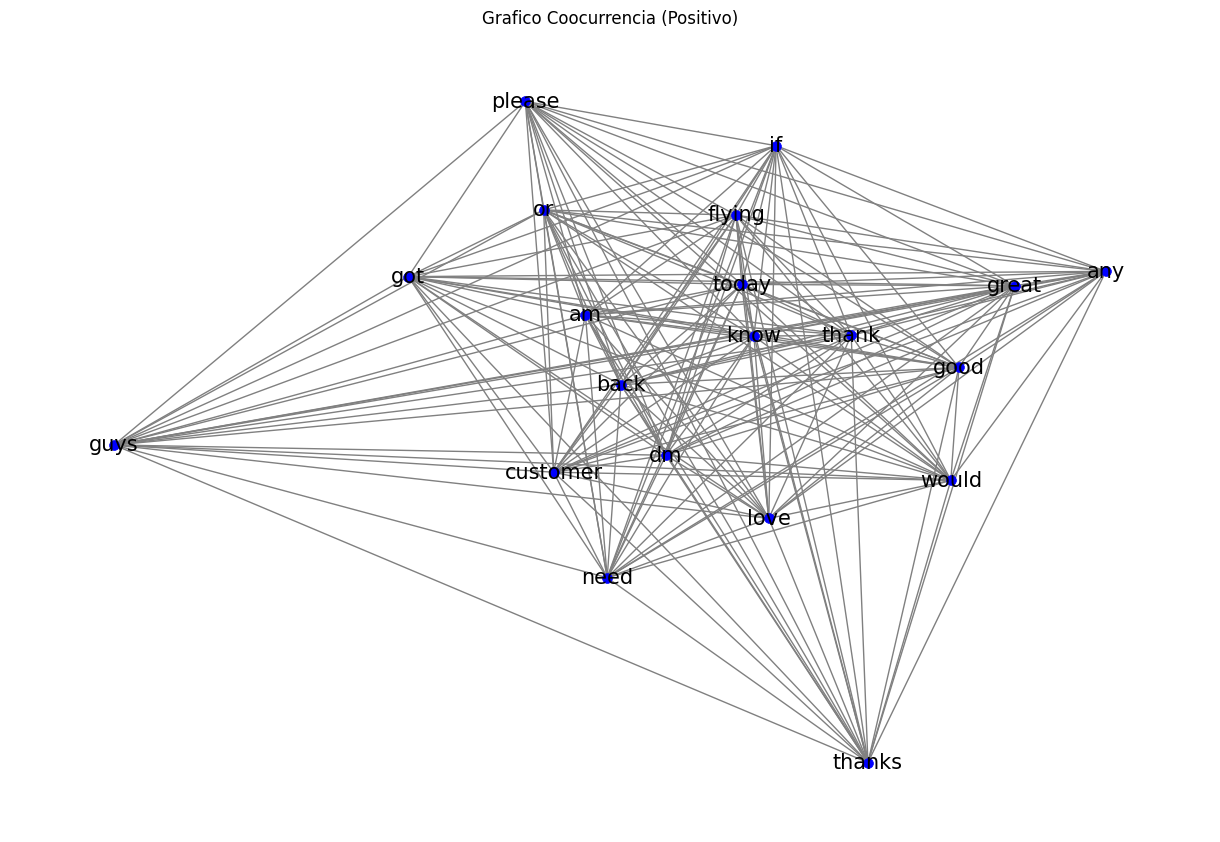

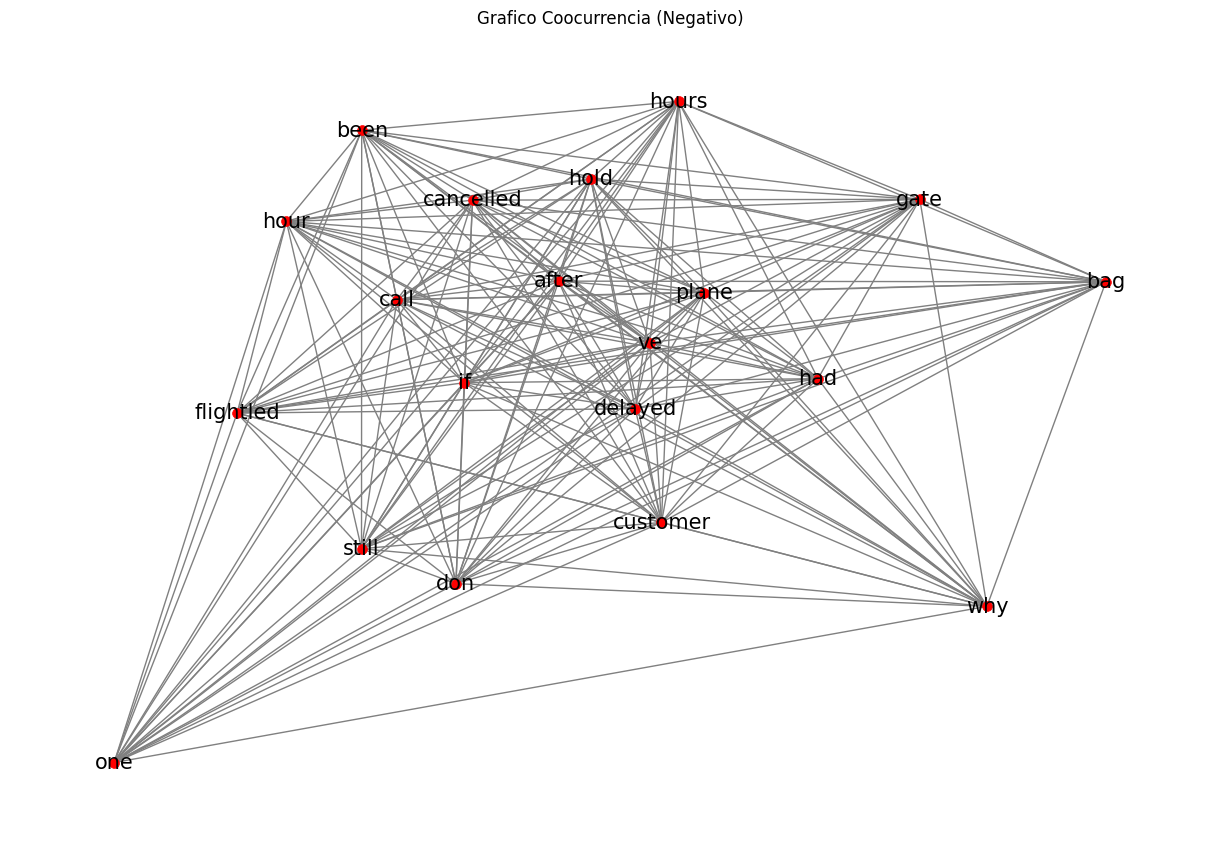

In [ ]:
import matplotlib.pyplot as plt

# Visualizar el grafo positivo
plt.figure(figsize=(12, 8))
pos_positive = nx.spring_layout(G_positive)
nx.draw(G_positive, pos=pos_positive, with_labels=True, font_size=15, font_color='black', node_size=50, node_color='blue', edge_color='gray', linewidths=0.5)
plt.title('Grafico Coocurrencia (Positivo)')
plt.show()

# Visualizar el grafo negativo
plt.figure(figsize=(12, 8))
pos_negative = nx.spring_layout(G_negative)
nx.draw(G_negative, pos=pos_negative, with_labels=True, font_size=15, font_color='black', node_size=50, node_color='red', edge_color='gray', linewidths=0.5)
plt.title('Grafico Coocurrencia (Negativo)')
plt.show()


Como ultimo paso vamos a mostrar de forma numerica las veces que las palabras mas usadas han sido usadas junto a otras palabras.

In [ ]:
def relacion(cod1,cod2):
  rela=0
  for i in X_train_vectorizado.toarray():
    if (i[cod1]>=1 and i[cod2]>=1):
      rela+=1
  return rela

In [ ]:
def lista_codigos(vect,lista):
  l=[]
  for p in lista:
    l.append(vect.vocabulary_[p])
  return l

In [ ]:
def matriz_relaciones(vect,lista1,lista2):
  codlista1=lista_codigos(vect,lista1)
  codlista2=lista_codigos(vect,lista2)
  l=[]
  aux1=0


  if codlista1==codlista2:
    for c in codlista1:

      if(c!=codlista2[0]):
        l.append((lista1[aux1],lista2[0],relacion(c,codlista2[0])))
      aux1+=1
  else:
    for c in codlista1:
      aux2=0
      for p in codlista2:
        if(c!=p):
          l.append((lista1[aux1],lista2[aux2],relacion(c,p)))
        aux2+=1
      aux1+=1

  return l


In [ ]:
lista1=['thanks','thank',
'will',
'great',
'please',
'flights',
'there',
'if',
'any']
lista2=['cancelled',
'been',
'hours',
'hold',
'customer',
'they',
'plane',
'why',
'delayed',
'amp']

l=matriz_relaciones(vectorizador,lista1,lista2)
for i in l:
  print(i)

('thanks', 'cancelled', 36)
('thanks', 'been', 22)
('thanks', 'hours', 26)
('thanks', 'hold', 14)
('thanks', 'customer', 42)
('thanks', 'they', 22)
('thanks', 'plane', 19)
('thanks', 'why', 11)
('thanks', 'delayed', 19)
('thanks', 'amp', 24)
('thank', 'cancelled', 9)
('thank', 'been', 11)
('thank', 'hours', 5)
('thank', 'hold', 7)
('thank', 'customer', 29)
('thank', 'they', 9)
('thank', 'plane', 7)
('thank', 'why', 3)
('thank', 'delayed', 5)
('thank', 'amp', 12)
('will', 'cancelled', 36)
('will', 'been', 22)
('will', 'hours', 18)
('will', 'hold', 13)
('will', 'customer', 27)
('will', 'they', 48)
('will', 'plane', 18)
('will', 'why', 16)
('will', 'delayed', 25)
('will', 'amp', 19)
('great', 'cancelled', 5)
('great', 'been', 13)
('great', 'hours', 4)
('great', 'hold', 4)
('great', 'customer', 22)
('great', 'they', 8)
('great', 'plane', 10)
('great', 'why', 1)
('great', 'delayed', 4)
('great', 'amp', 8)
('please', 'cancelled', 28)
('please', 'been', 32)
('please', 'hours', 26)
('please', 

In [ ]:
l=matriz_relaciones(vectorizador,lista1,lista1)
for i in l:
  print(i)

('thank', 'thanks', 3)
('will', 'thanks', 39)
('great', 'thanks', 51)
('please', 'thanks', 20)
('flights', 'thanks', 29)
('there', 'thanks', 22)
('if', 'thanks', 15)
('any', 'thanks', 13)


In [ ]:
l=matriz_relaciones(vectorizador,lista2,lista2)
for i in l:
  print(i)

('been', 'cancelled', 96)
('hours', 'cancelled', 66)
('hold', 'cancelled', 88)
('customer', 'cancelled', 37)
('they', 'cancelled', 33)
('plane', 'cancelled', 13)
('why', 'cancelled', 44)
('delayed', 'cancelled', 31)
('amp', 'cancelled', 54)


Aqui podemos observar el resultado. Resulta interesante observar como esta informacion esta respaldada por los grafos de arriba ya que las palabras con mas relacion con otra, en el grafo tiene muchos mas aristas hacia esa palabra.

Conclusiones:

En resumen, el modelo basado en puntuaciones tiene un rendimiento generalmente sólido. Además, tiene la capacidad de identificar de manera efectiva de tweets negativos,  aunque su capacidad para determinar tweets positivos es más limitada. Esto respalda la utilidad del modelo en la tarea prevista y sugiere su aplicabilidad para clasificar tweets con eficacia, especialmente en la detección de comentarios negativos.

Por lo tanto, se concluye que el modelo puede resultar útil para la identificación de tweets negativos, ofreciendo a las empresas una herramienta eficaz para evaluar el feedback recibido a través de plataformas como Twitter u otras redes sociales y plataformas de reseñas.

